<a href="https://colab.research.google.com/github/Roll1ngo/Authorization_and_authentication_synopsis/blob/master/Hw_9_gpNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from keras.datasets import fashion_mnist, mnist
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, BatchNormalization, Dropout
from keras.regularizers import l1, l2
from keras.optimizers import Adam, RMSprop, AdamW, Lion


import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

 Завантажуємо данні

In [20]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

# Дослідим данні

Дивимось кількість прикладів

In [22]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape, np.unique(train_labels), train_labels[0:10], test_labels[0:10]


((60000, 28, 28),
 (60000,),
 (10000, 28, 28),
 (10000,),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8))

Відмалюємо

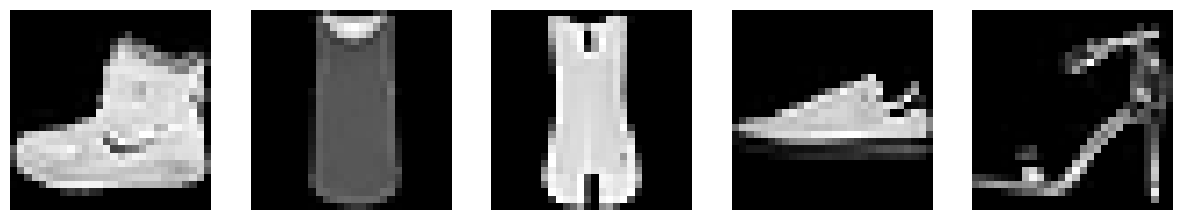

In [ ]:
fig,ax = plt.subplots(1, 5, figsize=(15, 10))

for idx in range(5):
  ax[idx].imshow(train_data[idx*2], cmap='gray')
  ax[idx].axis('off')


Дивимось розмірність

In [ ]:
train_data.min(), train_data.max(),train_data[25][25]

(0,
 255,
 array([  0,   0,   0,   0,   0,   0,   0,   3,   0,  13, 237, 224, 226,
        235, 208, 226, 218, 246,  65,   0,   3,   0,   0,   0,   0,   0,
          0,   0], dtype=uint8))

Нормалізуємо

In [24]:
train_data = train_data/255.0
test_data = test_data/255.0
train_data.min(), train_data.max(),train_data[25][25]

(0.0,
 1.0,
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.05098039,
        0.92941176, 0.87843137, 0.88627451, 0.92156863, 0.81568627,
        0.88627451, 0.85490196, 0.96470588, 0.25490196, 0.        ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]))

Залишимо чисельні значення для SparseCategoricalCrossentropy

In [25]:
train_labels_number = train_labels
test_labels_number = test_labels
train_labels_number, test_labels_number

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

Приводимо мітки класів до категоріального вигляду

In [15]:
train_labels[10], test_labels[10]

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int32)>)

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[10], test_labels[10]

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32))

Витягуємо матрицю у вектор будем за допомогою додаткового слою

In [ ]:

input = Input(train_data.shape[1:])

flatten_layer = Flatten()(input)

hidden_layer_1 = Dense(128, activation='relu')(flatten_layer)

output=Dense(10, activation='softmax')(hidden_layer_1)


Побудуємо модель

In [ ]:
tf.random.set_seed(42)

model = Model(inputs=input, outputs=output)
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics='accuracy')
model.summary()

NameError: name 'output' is not defined

Візьмемо функцію відмальовки loss та accuracy параметру history з лекції та трошки додамо наглядності.

In [ ]:
def plot_history(hst):

  plt.figure(figsize=(13,4))

  plt.subplot(1, 2, 1)
  plt.plot(hst.history['loss'], label='train')
  plt.plot(hst.history['val_loss'], label='test')
  plt.title('Loss')
  plt.legend()

  min_val_loss = min(hst.history['val_loss'])
  min_val_loss_epoch = hst.history['val_loss'].index(min_val_loss)

  # Annotating the min val_loss
  plt.annotate(f'Min Val Loss: {min_val_loss:.4f}',
                xy=(min_val_loss_epoch, min_val_loss),
                xytext=(min_val_loss_epoch, min_val_loss + 0.3),
                arrowprops=dict(facecolor='orange', shrink=0.05),
                horizontalalignment='center')

  plt.subplot(1, 2, 2)
  plt.plot([round(100*e,2) for e in hst.history['accuracy']], label='train')
  plt.plot([round(100*e,2) for e in hst.history['val_accuracy']], label='test')
  plt.title('Accuracy')
  plt.ylim(0, 100)
  plt.legend()

  max_val_accuracy = max(hst.history['val_accuracy'])
  max_val_accuracy_epoch = hst.history['val_accuracy'].index(max_val_accuracy)
  max_val_accuracy_percentage = round(100 * max_val_accuracy, 2)

    # Annotating the max val_accuracy
  plt.annotate(f'Max Val Accuracy: {max_val_accuracy_percentage}%',
                xy=(max_val_accuracy_epoch, max_val_accuracy_percentage),
                xytext=(max_val_accuracy_epoch, 102),
                arrowprops=dict(facecolor='orange', shrink=0.05),
                horizontalalignment='center')

  plt.tight_layout()
  plt.show()

Тренуємо модель та зберігаємо історію

Почнемо з 1 прихованого слоя на 64 нейрони. Після змін параметрів epoch та batch_size суттєвих змін не відбувається.

In [ ]:
history = model.fit(train_data, train_labels, epochs=100,
                    validation_data=(test_data, test_labels),
                    batch_size=600)


Epoch 1/100
100/100 [==============================] - 3s 11ms/step - loss: 1.7181 - accuracy: 0.4743 - val_loss: 1.3220 - val_accuracy: 0.6288
Epoch 2/100
100/100 [==============================] - 1s 7ms/step - loss: 1.1379 - accuracy: 0.6657 - val_loss: 1.0230 - val_accuracy: 0.6764
Epoch 3/100
100/100 [==============================] - 1s 8ms/step - loss: 0.9376 - accuracy: 0.7044 - val_loss: 0.8946 - val_accuracy: 0.7059
Epoch 4/100
100/100 [==============================] - 0s 5ms/step - loss: 0.8386 - accuracy: 0.7333 - val_loss: 0.8202 - val_accuracy: 0.7305
Epoch 5/100
100/100 [==============================] - 1s 7ms/step - loss: 0.7775 - accuracy: 0.7537 - val_loss: 0.7707 - val_accuracy: 0.7466
Epoch 6/100
100/100 [==============================] - 1s 6ms/step - loss: 0.7341 - accuracy: 0.7676 - val_loss: 0.7351 - val_accuracy: 0.7593
Epoch 7/100
100/100 [==============================] - 1s 6ms/step - loss: 0.7012 - accuracy: 0.7780 - val_loss: 0.7068 - val_accuracy: 0.768

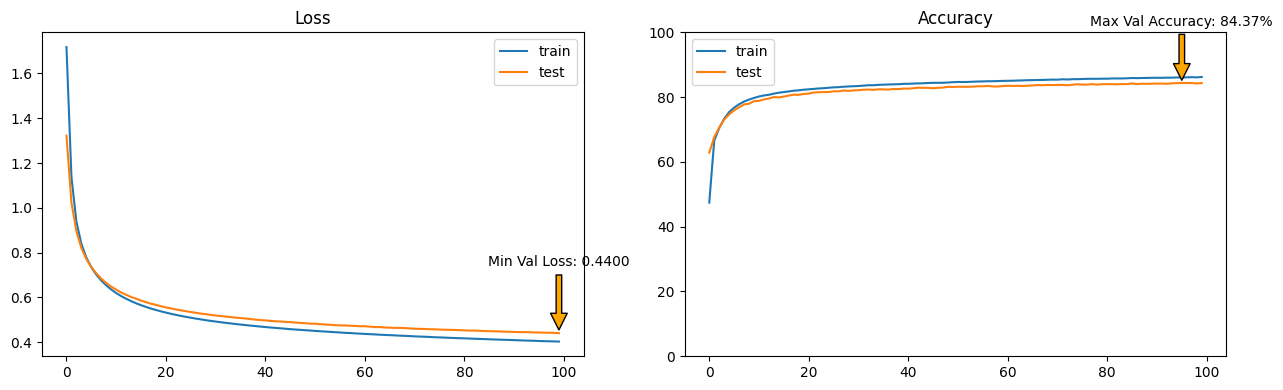

In [ ]:
plot_history(history)
# Кращій результат 1000/1000 [==============================] - 4s 4ms/step - loss: 0.2448 - accuracy: 0.9135 - val_loss: 0.3432 - val_accuracy: 0.8793

Ускладнемо модель додавши нейронів на прихований слой до 128 та 256

In [ ]:
input = Input(train_data.shape[1:])

flatten_layer = Flatten()(input)

hidden_layer_1 = Dense(256, activation='LeakyReLU')(flatten_layer)

output=Dense(10, activation='softmax')(hidden_layer_1)

tf.random.set_seed(42)

model = Model(inputs=input, outputs=output)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')
model.summary()
history = model.fit(train_data, train_labels, epochs=10,
                    validation_data=(test_data, test_labels),
                    batch_size=64)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 0.5086 - accuracy: 0.8215 - val_loss: 0.4656 - val_accuracy: 0.8319
Epoch 2/1

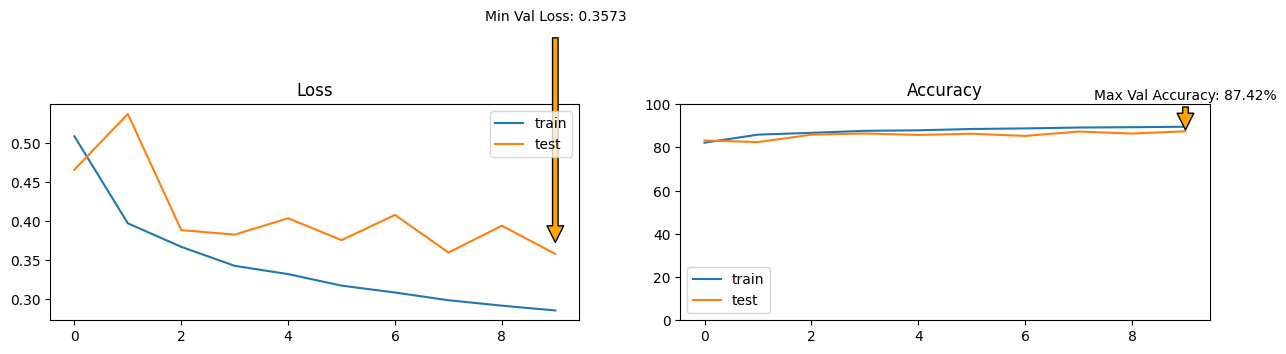

In [ ]:
plot_history(history)

In [ ]:
# 938/938 [==============================] - 6s 6ms/step - loss: 0.2843 - accuracy: 0.8952 - val_loss: 0.3552 - val_accuracy: 0.8742


Результат суттєво не змінився. Додамо другий прихований слой та оптимізатор з регулюванням швидкості навчання

In [ ]:
input = Input(train_data.shape[1:])

flatten_layer = Flatten()(input)

hidden_layer_1 = Dense(256, activation='LeakyReLU')(flatten_layer)

hidden_layer_2 = Dense(128, activation='LeakyReLU')(hidden_layer_1)

output=Dense(10, activation='softmax')(hidden_layer_2)

tf.random.set_seed(42)

model = Model(inputs=input, outputs=output)
model.compile(optimizer= Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics='accuracy')
model.summary()
history = model.fit(train_data, train_labels, epochs=50,
                    validation_data=(test_data, test_labels),
                    batch_size=250)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
240/240 

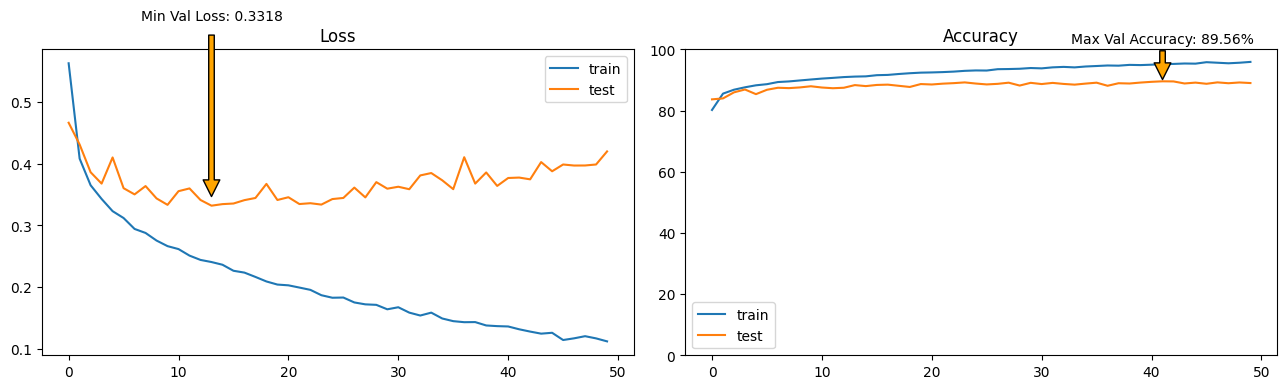

In [ ]:
plot_history(history)

Бачимо як модель на середині навчання уходить в перенавчання, додамо 2 dropout_layers

In [ ]:

input = Input(train_data.shape[1:])

flatten_layer = Flatten()(input)

hidden_layer_1 = Dense(256, activation='LeakyReLU')(flatten_layer)

dropout_layer_1 = Dropout(0.5)(hidden_layer_1)

hidden_layer_2 = Dense(128, activation='LeakyReLU')(dropout_layer_1)

dropout_layer_2= Dropout(0.5)(hidden_layer_2)


output=Dense(10, activation='softmax')(dropout_layer_2)

tf.random.set_seed(42)

model = Model(inputs=input, outputs=output)
model.compile(optimizer= 'SGD',
              loss='categorical_crossentropy',
              metrics='accuracy')
model.summary()
history = model.fit(train_data, train_labels, epochs=100,
                    validation_data=(test_data, test_labels),
                    batch_size=64)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 256)               200960    
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 10)                1290

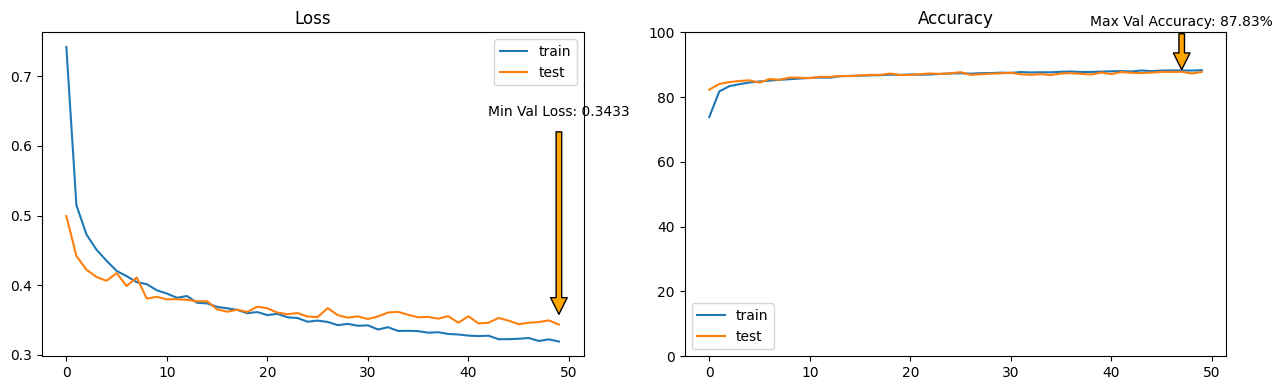

In [ ]:
plot_history(history)


Перенавчання позбулись. Метрики не покращуються. Додамо ще слоїв та зменшим кількість нейронів

In [ ]:

tf.random.set_seed(42)

input = Input(train_data.shape[1:])

flatten_layer = Flatten()(input)


hidden_1 = Dense(256, activation='relu')(flatten_layer)
dropout_1 = Dropout(0.5)(hidden_1)

hidden_2 = Dense(128, activation='relu')(dropout_1)
dropout_2 = Dropout(0.5)(hidden_2)

hidden_3 = Dense(128, activation='relu')(dropout_2)
dropout_3 = Dropout(0.5)(hidden_3)

output = Dense(10, activation='softmax')(dropout_3)

model = Model(inputs=input, outputs=output)

optimizer = 'SGD'

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics='accuracy')

model.summary()

history = model.fit(train_data, train_labels, epochs=30,
                    validation_data=(test_data, test_labels),
                    batch_size=60)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               1651

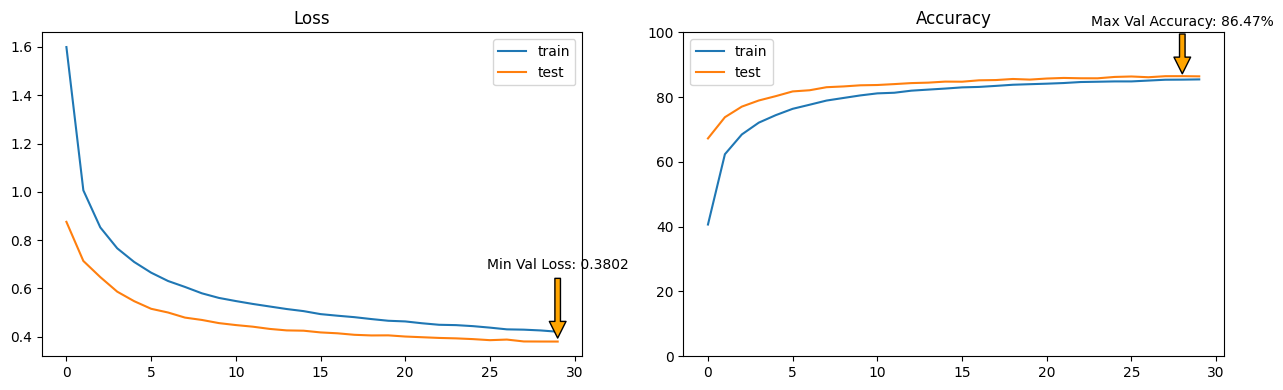

In [ ]:
plot_history(history)


Змінимо оптимізатор на RMSprop

In [ ]:
tf.random.set_seed(42)

input = Input(train_data.shape[1:])

flatten_layer = Flatten()(input)


hidden_1 = Dense(256, activation='relu')(flatten_layer)
dropout_1 = Dropout(0.5)(hidden_1)

hidden_2 = Dense(128, activation='relu')(dropout_1)
dropout_2 = Dropout(0.5)(hidden_2)

hidden_3 = Dense(128, activation='relu')(dropout_2)
dropout_3 = Dropout(0.5)(hidden_3)

output = Dense(10, activation='softmax')(dropout_3)

model = Model(inputs=input, outputs=output)

optimizer = RMSprop(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics='accuracy')

model.summary()

history = model.fit(train_data, train_labels, epochs=30,
                    validation_data=(test_data, test_labels),
                    batch_size=60)


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               200960    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               1651

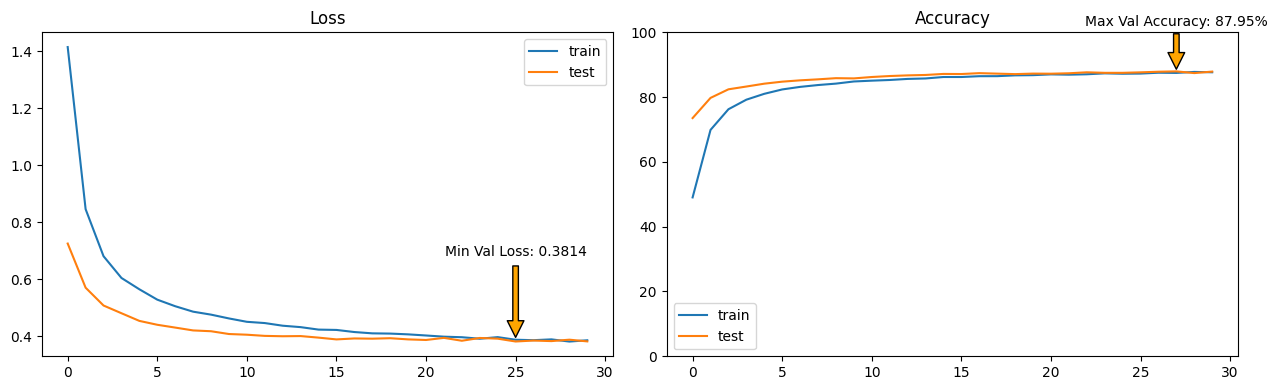

In [ ]:
plot_history(history)


In [ ]:
tf.random.set_seed(42)

input = Input(train_data.shape[1:])

flatten_layer = Flatten()(input)


hidden_1 = Dense(256, activation='relu')(flatten_layer)
dropout_1 = Dropout(0.5)(hidden_1)

hidden_2 = Dense(512, activation='relu')(dropout_1)
dropout_2 = Dropout(0.5)(hidden_2)

hidden_3 = Dense(512, activation='relu')(dropout_2)
dropout_3 = Dropout(0.5)(hidden_3)

output = Dense(10, activation='softmax')(dropout_2)

model = Model(inputs=input, outputs=output)

optimizer = AdamW(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics='accuracy')

model.summary()

history = model.fit(train_data, train_labels, epochs=100,
                    validation_data=(test_data, test_labels),
                    batch_size=600)

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_54 (Dense)            (None, 256)               200960    
                                                                 
 dropout_32 (Dropout)        (None, 256)               0         
                                                                 
 dense_55 (Dense)            (None, 512)               131584    
                                                                 
 dropout_33 (Dropout)        (None, 512)               0         
                                                                 
 dense_57 (Dense)            (None, 10)                513

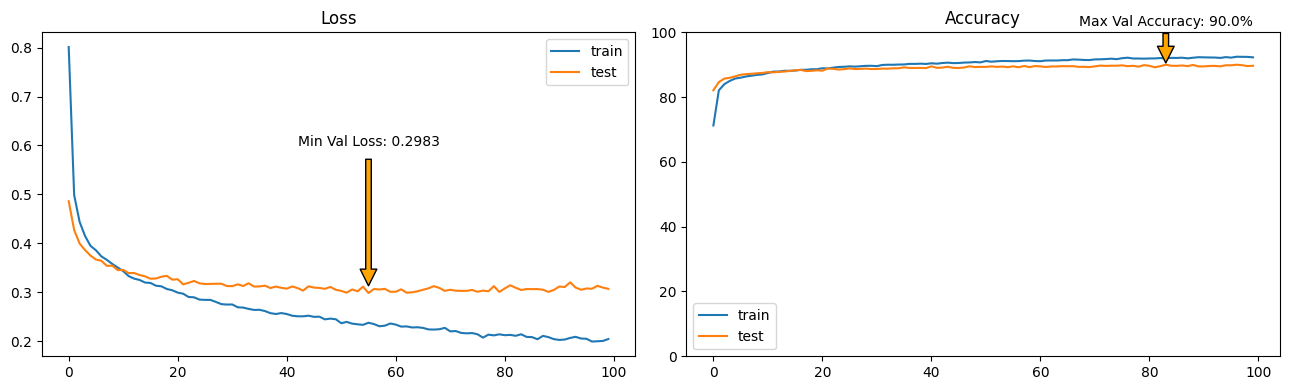

In [ ]:
plot_history(history)


приберем drop layers та пробуємо регуляризації: L2 Regularization (Ridge)
L1 Regularization (Lasso)
Batch Normalization:
Label Smoothing:

In [ ]:

tf.random.set_seed(42)

input = Input(train_data.shape[1:])

flatten_layer = Flatten()(input)

hidden_1 = Dense(256, activation='relu')(flatten_layer)
hidden_1 = BatchNormalization()(hidden_1)

hidden_2 = Dense(256, activation='relu')(hidden_1)
hidden_2 = BatchNormalization()(hidden_2)

hidden_3 = Dense(512, activation='relu')(hidden_2)
hidden_3 = BatchNormalization()(hidden_3)

output = Dense(10, activation='softmax')(hidden_3)

model = Model(inputs=input, outputs=output)

optimizer = AdamW(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(train_data, train_labels, epochs=100,
                    validation_data=(test_data, test_labels),
                    batch_size=600)


Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_27 (Flatten)        (None, 784)               0         
                                                                 
 dense_88 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization_3 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_89 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_4 (Bat  (None, 256)               1024      
 chNormalization)                                         

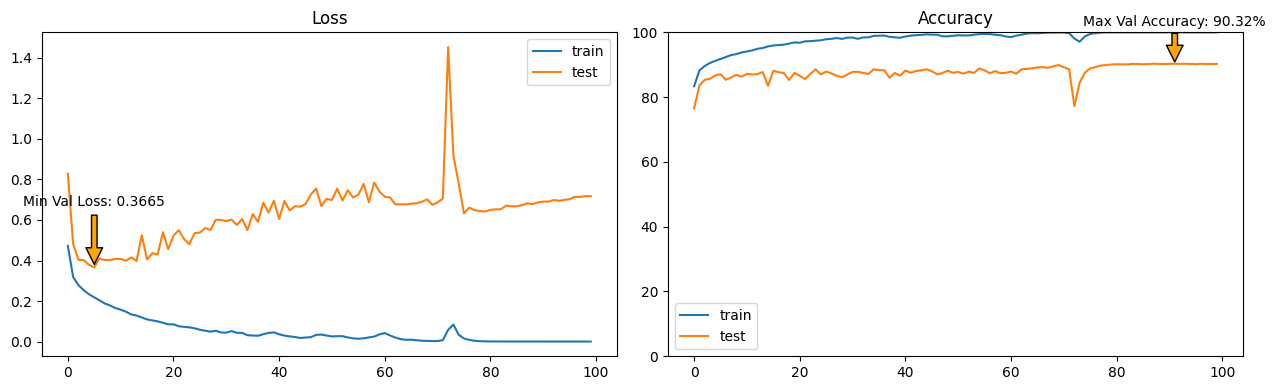

In [ ]:
plot_history(history)

Значимого покращення з l1,l2, BatchNormalization отримати не вдалося, останній знов зайшов в overfitting. Змінимо функцію втрат на sparse_categorical_accuracy та повернемо drop layers


In [26]:
#Повернемо integer значення для labels для роботи з SparseCategoricalCrossentropy
train_labels = train_labels_number
test_labels = test_labels_number
print(train_labels, test_labels, train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

tf.random.set_seed(42)

input = Input(train_data.shape[1:])

flatten_layer = Flatten()(input)


hidden_1 = Dense(256, activation='relu')(flatten_layer)
batch_norm_1 = BatchNormalization()(hidden_1)
dropout_1 = Dropout(0.4)(batch_norm_1)


hidden_2 = Dense(128, activation='relu')(dropout_1)
batch_norm_2 = BatchNormalization()(hidden_2)
dropout_2 = Dropout(0.4)(batch_norm_2)


hidden_3 = Dense(512, activation='relu')(dropout_2)
batch_norm_3 = BatchNormalization()(hidden_3)
dropout_3 = Dropout(0.4)(batch_norm_3)


output = Dense(10, activation='softmax')(dropout_3)


model = Model(inputs=input, outputs=output)


optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer,
              loss='SparseCategoricalCrossentropy',
              metrics='SparseCategoricalAccuracy')


model.summary()


history = model.fit(train_data, train_labels, epochs=100,
                    validation_data=(test_data, test_labels),
                    batch_size=96)

[9 0 0 ... 3 0 5] [9 2 1 ... 8 1 5] (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization_12 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128

Підлаштуємо вивід графіків

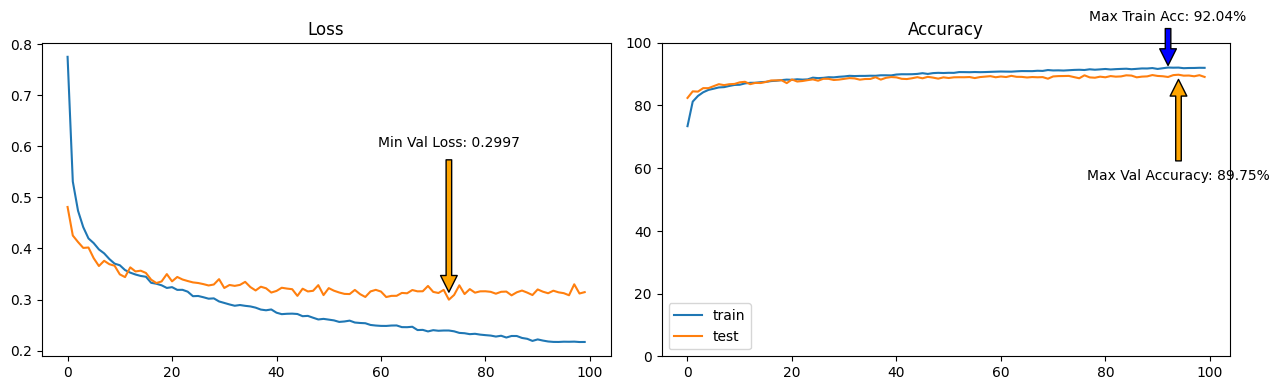

In [35]:
    hst = history

    plt.figure(figsize=(13,4))


    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')


    min_val_loss = min(hst.history['val_loss'])
    min_val_loss_epoch = hst.history['val_loss'].index(min_val_loss)

    plt.annotate(f'Min Val Loss: {min_val_loss:.4f}',
                 xy=(min_val_loss_epoch, min_val_loss),
                 xytext=(min_val_loss_epoch, min_val_loss + 0.3),
                 arrowprops=dict(facecolor='orange', shrink=0.05),
                 horizontalalignment='center')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e,2) for e in hst.history['sparse_categorical_accuracy']], label='train')
    plt.plot([round(100*e,2) for e in hst.history['val_sparse_categorical_accuracy']], label='test')
    plt.title('Accuracy')
    plt.ylim(0, 100)
    plt.legend()

    max_train_accuracy = max(hst.history['sparse_categorical_accuracy'])
    max_train_accuracy_epoch = hst.history['sparse_categorical_accuracy'].index(max_train_accuracy)
    max_train_accuracy_percentage = round(100 * max_train_accuracy, 2)


    plt.annotate(f'Max Train Acc: {max_train_accuracy_percentage}%',
                 xy=(max_train_accuracy_epoch, max_train_accuracy_epoch),
                 xytext=(max_train_accuracy_epoch,max_train_accuracy_epoch + 15),
                 arrowprops=dict(facecolor='blue', shrink=0.05),
                 horizontalalignment='center')

    max_val_accuracy = max(hst.history['val_sparse_categorical_accuracy'])
    max_val_accuracy_epoch = hst.history['val_sparse_categorical_accuracy'].index(max_val_accuracy)
    max_val_accuracy_percentage = round(100 * max_val_accuracy, 2)


    plt.annotate(f'Max Val Accuracy: {max_val_accuracy_percentage}%',
                 xy=(max_val_accuracy_epoch, max_val_accuracy_percentage),
                 xytext=(max_val_accuracy_epoch, max_val_accuracy +55.5),
                 arrowprops=dict(facecolor='orange', shrink=0.05),
                 horizontalalignment='center')

    plt.tight_layout()
    plt.show()


Межа в 91% виявилася нездоланною на данному етапі наявних знань та вмінь. Буду шукать рішення далі, а поки здаю та чекаю фідбека. Дякую